In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
feat_path = 'results/feature_clu_dead_r2_ft_0914.xlsx'
feat_df = pd.read_excel(feat_path)

In [3]:
feat_df

,文件名,基质区域肿瘤细胞密度,肿瘤区域肿瘤细胞密度,肿瘤边界2000-1800um区域肿瘤细胞密度,肿瘤边界1800-1600um区域肿瘤细胞密度,肿瘤边界1600-1400um区域肿瘤细胞密度,肿瘤边界1400-1200um区域肿瘤细胞密度,肿瘤边界1200-1000um区域肿瘤细胞密度,肿瘤边界1000-800um区域肿瘤细胞密度,肿瘤边界800-600um区域肿瘤细胞密度,...,肿瘤边界1000-800um区域面积,肿瘤边界800-600um区域面积,肿瘤边界600-400um区域面积,肿瘤边界400-200um区域面积,肿瘤边界200-0um区域面积,肿瘤边界0--100um区域面积,肿瘤边界-100--200um区域面积,肿瘤边界-200--300um区域面积,肿瘤边界-300--400um区域面积,肿瘤边界-400--500um区域面积
0,543766-2,1314.924837,5814.440250,1001.595269,1176.619409,1311.197120,1218.734864,964.687791,954.952076,884.817711,...,2.735216,4.733178,10.039905,19.291380,41.511285,13.088634,4.109682,2.117696,0.959667,0.609908
1,559641,171.579128,4437.094275,78.184488,78.974683,92.016072,77.885664,54.697310,113.607541,181.680112,...,0.378496,0.489872,0.414336,0.436944,0.741600,1.124384,0.073472,0.000000,0.000000,0.000000
2,572782,267.725116,3445.844399,12.852149,66.123572,43.106033,13.194005,18.826010,63.393763,133.075946,...,1.119984,1.247408,1.514800,2.871504,5.869136,3.207552,0.516112,0.141984,0.020192,0.000000
3,552160,701.130957,5191.748293,178.421894,145.283743,155.607530,157.380123,194.855295,213.045713,212.594585,...,2.023040,2.493008,2.851504,2.959872,19.621248,19.778592,16.388976,10.708320,5.581952,2.375712
4,475658-2022-05-31_10_40_53,6291.022125,12295.084391,NaN,NaN,NaN,0.000000,88.545711,1397.307579,2770.686891,...,0.043655,0.143647,0.947325,3.575184,18.550732,12.200194,7.514984,3.750054,2.027416,0.879762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,N080489-2-2022-05-31_10_26_30,1991.193521,4168.561149,NaN,NaN,NaN,1191.306286,1539.530139,1789.189157,2455.717385,...,0.685227,1.268468,2.420421,5.756062,16.333942,8.006332,6.865675,5.223350,4.521148,2.930410
138,N056917-37-38-2022-05-31_09_41_37,1453.896991,8339.744130,549.878028,574.282729,651.973866,595.420031,799.600617,739.633541,826.849963,...,2.509351,5.014211,9.335390,15.578685,26.216267,15.954721,11.699517,8.336920,7.646331,6.751347
139,N057098-27-28-2022-05-31_09_51_14,1498.112543,5576.628051,701.079009,725.072131,819.298601,839.735741,823.362895,879.943504,1010.935535,...,6.078799,10.033281,14.002949,22.894936,46.469035,17.440497,12.290513,8.367065,6.360409,3.884888
140,525239,317.933817,5541.011866,62.704471,117.977249,105.029408,97.227840,94.699080,124.404847,103.659816,...,1.004784,1.601392,2.828752,5.081120,24.790176,19.782512,12.178896,8.500528,5.323824,2.985296


In [4]:
import os
names = []
for name in feat_df['文件名']:
    name = name.split('-')[0]
    names.append(name)
feat_df['文件名'] = names

In [5]:
surv_path = "results/生存信息.xlsx"
surv_df = pd.read_excel(surv_path)
surv_df

,ID,days_to_last_follow_up,vital_status
0,433375,110,0
1,434171,109,0
2,434640,27,1
3,434983,108,0
4,436849,12,1
...,...,...,...
99,N074294,25,0
100,N076691,24,0
101,N079828,23,0
102,N080489,22,0


In [13]:
# 为feat_pd添加生存信息
feat_df['days'] = None
feat_df['vital_status'] = None
feat_df

,文件名,基质区域肿瘤细胞密度,肿瘤区域肿瘤细胞密度,肿瘤边界2000-1800um区域肿瘤细胞密度,肿瘤边界1800-1600um区域肿瘤细胞密度,肿瘤边界1600-1400um区域肿瘤细胞密度,肿瘤边界1400-1200um区域肿瘤细胞密度,肿瘤边界1200-1000um区域肿瘤细胞密度,肿瘤边界1000-800um区域肿瘤细胞密度,肿瘤边界800-600um区域肿瘤细胞密度,...,肿瘤边界600-400um区域面积,肿瘤边界400-200um区域面积,肿瘤边界200-0um区域面积,肿瘤边界0--100um区域面积,肿瘤边界-100--200um区域面积,肿瘤边界-200--300um区域面积,肿瘤边界-300--400um区域面积,肿瘤边界-400--500um区域面积,days,vital_status
0,543766,1314.924837,5814.440250,1001.595269,1176.619409,1311.197120,1218.734864,964.687791,954.952076,884.817711,...,10.039905,19.291380,41.511285,13.088634,4.109682,2.117696,0.959667,0.609908,None,None
1,552160,701.130957,5191.748293,178.421894,145.283743,155.607530,157.380123,194.855295,213.045713,212.594585,...,2.851504,2.959872,19.621248,19.778592,16.388976,10.708320,5.581952,2.375712,None,None
2,475658,6291.022125,12295.084391,0.000000,0.000000,0.000000,0.000000,88.545711,1397.307579,2770.686891,...,0.947325,3.575184,18.550732,12.200194,7.514984,3.750054,2.027416,0.879762,None,None
3,455827,1996.507093,9221.094426,489.191853,492.630586,510.098138,668.066758,709.522809,645.259140,622.812242,...,3.961451,5.873665,22.945125,18.122430,17.742431,13.740248,10.502256,6.930447,None,None
4,N015772,1034.770665,4176.857948,506.385852,538.645985,552.934035,583.794644,549.318863,585.599753,637.940895,...,20.874980,37.636004,79.011812,25.851500,18.299374,12.436182,9.208171,5.875872,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,N080489,1991.193521,4168.561149,0.000000,0.000000,0.000000,1191.306286,1539.530139,1789.189157,2455.717385,...,2.420421,5.756062,16.333942,8.006332,6.865675,5.223350,4.521148,2.930410,None,None
110,N056917,1453.896991,8339.744130,549.878028,574.282729,651.973866,595.420031,799.600617,739.633541,826.849963,...,9.335390,15.578685,26.216267,15.954721,11.699517,8.336920,7.646331,6.751347,None,None
111,N057098,1498.112543,5576.628051,701.079009,725.072131,819.298601,839.735741,823.362895,879.943504,1010.935535,...,14.002949,22.894936,46.469035,17.440497,12.290513,8.367065,6.360409,3.884888,None,None
112,525239,317.933817,5541.011866,62.704471,117.977249,105.029408,97.227840,94.699080,124.404847,103.659816,...,2.828752,5.081120,24.790176,19.782512,12.178896,8.500528,5.323824,2.985296,None,None


In [15]:
for patient_id in surv_df['ID　']:
    if str(patient_id) in feat_df['文件名'].values:
        patient_info = surv_df[surv_df['ID　']==patient_id]
        feat_df.loc[feat_df['文件名'] == str(patient_id), 'days'] = int(patient_info['days_to_last_follow_up'].values)
        feat_df.loc[feat_df['文件名'] == str(patient_id), 'vital_status'] = int(patient_info['vital_status'].values)
# 去除掉没有生存信息的行
feat_df = feat_df.dropna(subset=['days'])
# 将特征值为nan的赋值为0
feat_df.fillna(0, inplace=True)
feat_df = feat_df.reset_index(drop=True)
feat_df

C:\Users\scutbci\AppData\Local\Temp\ipykernel_57060\3790573400.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  feat_df.loc[feat_df['文件名'] == str(patient_id), 'days'] = int(patient_info['days_to_last_follow_up'].values)
C:\Users\scutbci\AppData\Local\Temp\ipykernel_57060\3790573400.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  feat_df.loc[feat_df['文件名'] == str(patient_id), 'vital_status'] = int(patient_info['vital_status'].values)


,文件名,基质区域肿瘤细胞密度,肿瘤区域肿瘤细胞密度,肿瘤边界2000-1800um区域肿瘤细胞密度,肿瘤边界1800-1600um区域肿瘤细胞密度,肿瘤边界1600-1400um区域肿瘤细胞密度,肿瘤边界1400-1200um区域肿瘤细胞密度,肿瘤边界1200-1000um区域肿瘤细胞密度,肿瘤边界1000-800um区域肿瘤细胞密度,肿瘤边界800-600um区域肿瘤细胞密度,...,肿瘤边界600-400um区域面积,肿瘤边界400-200um区域面积,肿瘤边界200-0um区域面积,肿瘤边界0--100um区域面积,肿瘤边界-100--200um区域面积,肿瘤边界-200--300um区域面积,肿瘤边界-300--400um区域面积,肿瘤边界-400--500um区域面积,days,vital_status
0,543766,1314.924837,5814.440250,1001.595269,1176.619409,1311.197120,1218.734864,964.687791,954.952076,884.817711,...,10.039905,19.291380,41.511285,13.088634,4.109682,2.117696,0.959667,0.609908,69,0
1,552160,701.130957,5191.748293,178.421894,145.283743,155.607530,157.380123,194.855295,213.045713,212.594585,...,2.851504,2.959872,19.621248,19.778592,16.388976,10.708320,5.581952,2.375712,67,0
2,475658,6291.022125,12295.084391,0.000000,0.000000,0.000000,0.000000,88.545711,1397.307579,2770.686891,...,0.947325,3.575184,18.550732,12.200194,7.514984,3.750054,2.027416,0.879762,93,0
3,455827,1996.507093,9221.094426,489.191853,492.630586,510.098138,668.066758,709.522809,645.259140,622.812242,...,3.961451,5.873665,22.945125,18.122430,17.742431,13.740248,10.502256,6.930447,47,1
4,N015772,1034.770665,4176.857948,506.385852,538.645985,552.934035,583.794644,549.318863,585.599753,637.940895,...,20.874980,37.636004,79.011812,25.851500,18.299374,12.436182,9.208171,5.875872,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,N080489,1991.193521,4168.561149,0.000000,0.000000,0.000000,1191.306286,1539.530139,1789.189157,2455.717385,...,2.420421,5.756062,16.333942,8.006332,6.865675,5.223350,4.521148,2.930410,22,0
110,N056917,1453.896991,8339.744130,549.878028,574.282729,651.973866,595.420031,799.600617,739.633541,826.849963,...,9.335390,15.578685,26.216267,15.954721,11.699517,8.336920,7.646331,6.751347,33,0
111,N057098,1498.112543,5576.628051,701.079009,725.072131,819.298601,839.735741,823.362895,879.943504,1010.935535,...,14.002949,22.894936,46.469035,17.440497,12.290513,8.367065,6.360409,3.884888,33,0
112,525239,317.933817,5541.011866,62.704471,117.977249,105.029408,97.227840,94.699080,124.404847,103.659816,...,2.828752,5.081120,24.790176,19.782512,12.178896,8.500528,5.323824,2.985296,26,1


In [16]:
# 归一化
from sklearn.preprocessing import MinMaxScaler
feats = feat_df.drop(['文件名', 'days', 'vital_status'], axis=1)
scaler = MinMaxScaler()
feats = pd.DataFrame(scaler.fit_transform(feats), columns=feats.columns)
feats

,基质区域肿瘤细胞密度,肿瘤区域肿瘤细胞密度,肿瘤边界2000-1800um区域肿瘤细胞密度,肿瘤边界1800-1600um区域肿瘤细胞密度,肿瘤边界1600-1400um区域肿瘤细胞密度,肿瘤边界1400-1200um区域肿瘤细胞密度,肿瘤边界1200-1000um区域肿瘤细胞密度,肿瘤边界1000-800um区域肿瘤细胞密度,肿瘤边界800-600um区域肿瘤细胞密度,肿瘤边界600-400um区域肿瘤细胞密度,...,肿瘤边界1000-800um区域面积,肿瘤边界800-600um区域面积,肿瘤边界600-400um区域面积,肿瘤边界400-200um区域面积,肿瘤边界200-0um区域面积,肿瘤边界0--100um区域面积,肿瘤边界-100--200um区域面积,肿瘤边界-200--300um区域面积,肿瘤边界-300--400um区域面积,肿瘤边界-400--500um区域面积
0,0.197551,0.381324,0.556315,0.572482,0.607184,0.204765,0.218019,0.391168,0.208713,0.236104,...,0.190125,0.276086,0.480954,0.512578,0.345708,0.259605,0.117577,0.081920,0.037641,0.029356
1,0.098571,0.321879,0.099101,0.070687,0.072058,0.026442,0.044037,0.087268,0.050147,0.047550,...,0.140622,0.145417,0.136599,0.078645,0.156892,0.412006,0.518022,0.419642,0.218940,0.114348
2,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020011,0.572366,0.653558,0.915769,...,0.003034,0.008379,0.045381,0.094994,0.147658,0.239365,0.228628,0.146092,0.079521,0.042345
3,0.307464,0.706541,0.271711,0.239688,0.236214,0.112245,0.160352,0.264312,0.146911,0.195389,...,0.161155,0.177103,0.189770,0.156065,0.185562,0.374277,0.562160,0.538835,0.411928,0.333577
4,0.152374,0.224992,0.281261,0.262077,0.256051,0.098086,0.124146,0.239874,0.150479,0.173558,...,0.632784,0.836719,1.000000,1.000000,0.669176,0.550350,0.580323,0.487569,0.361170,0.282818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.306607,0.224200,0.000000,0.000000,0.000000,0.200157,0.347934,0.732889,0.579262,0.465630,...,0.047630,0.073990,0.115948,0.152940,0.128536,0.143827,0.207453,0.204012,0.177332,0.141047
110,0.219962,0.622403,0.305418,0.279416,0.301914,0.100039,0.180710,0.302969,0.195040,0.200909,...,0.174425,0.292479,0.447205,0.413930,0.213778,0.324896,0.365092,0.326415,0.299911,0.324956
111,0.227092,0.358622,0.389399,0.352782,0.379398,0.141088,0.186080,0.360443,0.238462,0.256195,...,0.422538,0.585240,0.670801,0.608325,0.388472,0.358742,0.384365,0.327600,0.249473,0.186988
112,0.036776,0.355222,0.034828,0.057402,0.048637,0.016336,0.021402,0.050959,0.024452,0.025536,...,0.069843,0.093409,0.135509,0.135007,0.201477,0.412095,0.380725,0.332847,0.208815,0.143689


In [22]:
feat_df = feat_df[["文件名", 'days', "vital_status"]]
feat_df = pd.concat([feat_df, feats], axis=1)
feat_df

,文件名,days,vital_status,基质区域肿瘤细胞密度,肿瘤区域肿瘤细胞密度,肿瘤边界2000-1800um区域肿瘤细胞密度,肿瘤边界1800-1600um区域肿瘤细胞密度,肿瘤边界1600-1400um区域肿瘤细胞密度,肿瘤边界1400-1200um区域肿瘤细胞密度,肿瘤边界1200-1000um区域肿瘤细胞密度,...,肿瘤边界1000-800um区域面积,肿瘤边界800-600um区域面积,肿瘤边界600-400um区域面积,肿瘤边界400-200um区域面积,肿瘤边界200-0um区域面积,肿瘤边界0--100um区域面积,肿瘤边界-100--200um区域面积,肿瘤边界-200--300um区域面积,肿瘤边界-300--400um区域面积,肿瘤边界-400--500um区域面积
0,543766,69,0,0.197551,0.381324,0.556315,0.572482,0.607184,0.204765,0.218019,...,0.190125,0.276086,0.480954,0.512578,0.345708,0.259605,0.117577,0.081920,0.037641,0.029356
1,552160,67,0,0.098571,0.321879,0.099101,0.070687,0.072058,0.026442,0.044037,...,0.140622,0.145417,0.136599,0.078645,0.156892,0.412006,0.518022,0.419642,0.218940,0.114348
2,475658,93,0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020011,...,0.003034,0.008379,0.045381,0.094994,0.147658,0.239365,0.228628,0.146092,0.079521,0.042345
3,455827,47,1,0.307464,0.706541,0.271711,0.239688,0.236214,0.112245,0.160352,...,0.161155,0.177103,0.189770,0.156065,0.185562,0.374277,0.562160,0.538835,0.411928,0.333577
4,N015772,53,0,0.152374,0.224992,0.281261,0.262077,0.256051,0.098086,0.124146,...,0.632784,0.836719,1.000000,1.000000,0.669176,0.550350,0.580323,0.487569,0.361170,0.282818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,N080489,22,0,0.306607,0.224200,0.000000,0.000000,0.000000,0.200157,0.347934,...,0.047630,0.073990,0.115948,0.152940,0.128536,0.143827,0.207453,0.204012,0.177332,0.141047
110,N056917,33,0,0.219962,0.622403,0.305418,0.279416,0.301914,0.100039,0.180710,...,0.174425,0.292479,0.447205,0.413930,0.213778,0.324896,0.365092,0.326415,0.299911,0.324956
111,N057098,33,0,0.227092,0.358622,0.389399,0.352782,0.379398,0.141088,0.186080,...,0.422538,0.585240,0.670801,0.608325,0.388472,0.358742,0.384365,0.327600,0.249473,0.186988
112,525239,26,1,0.036776,0.355222,0.034828,0.057402,0.048637,0.016336,0.021402,...,0.069843,0.093409,0.135509,0.135007,0.201477,0.412095,0.380725,0.332847,0.208815,0.143689


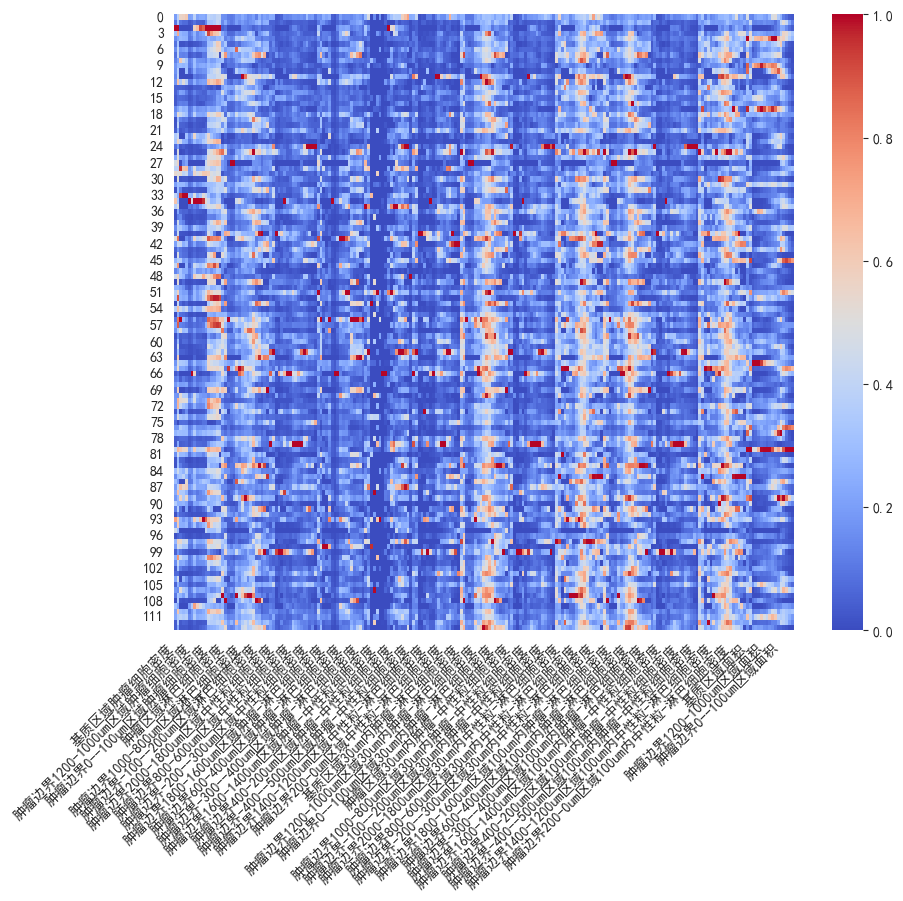

In [9]:
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 选择一个支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 处理负号显示问题
# 可视化整体的特征
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(feats, cmap='coolwarm')
# 旋转x轴标签
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()

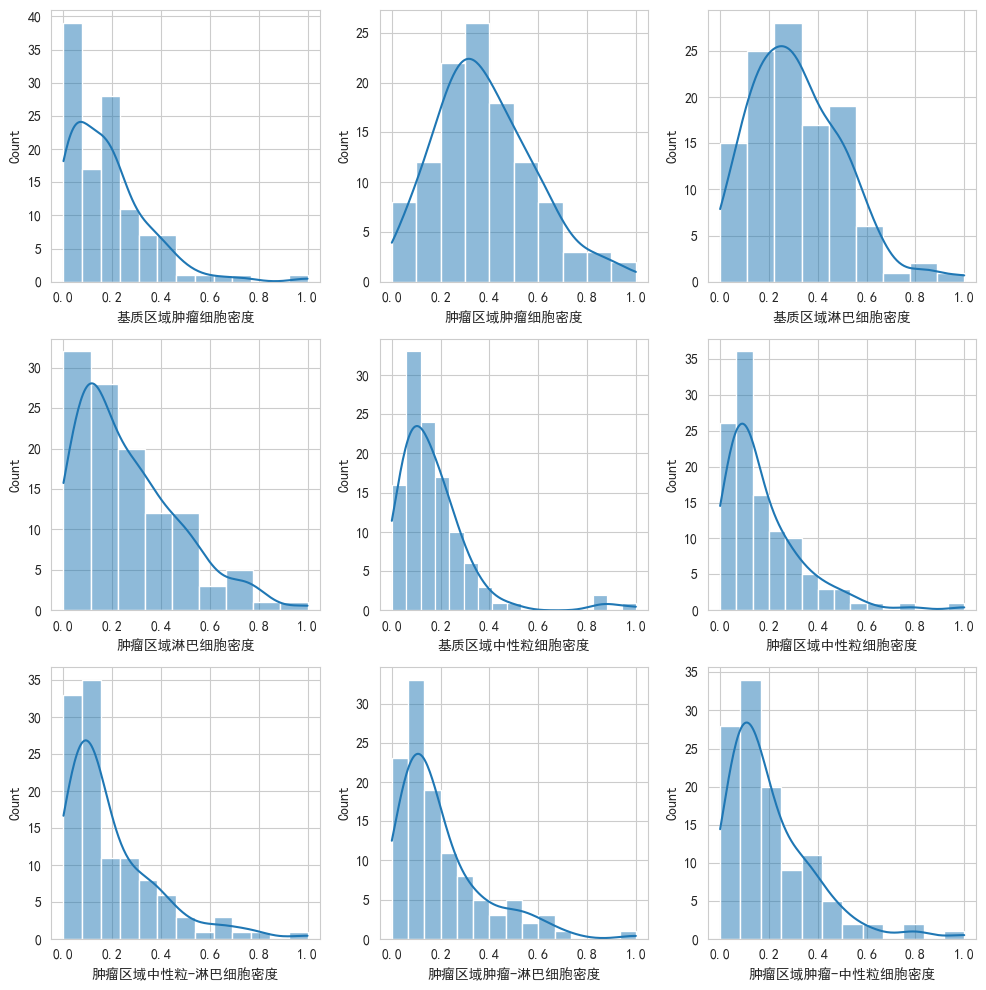

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 选择一个支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 处理负号显示问题
data = feats[["基质区域肿瘤细胞密度","肿瘤区域肿瘤细胞密度", "基质区域淋巴细胞密度", "肿瘤区域淋巴细胞密度", "基质区域中性粒细胞密度", "肿瘤区域中性粒细胞密度",
              "肿瘤区域中性粒-淋巴细胞密度", "肿瘤区域肿瘤-淋巴细胞密度", "肿瘤区域肿瘤-中性粒细胞密度"]]
# 设置子图布局
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.ravel() 
# 绘制每一列的直方图
for i, column in enumerate(data.columns):
    sns.histplot(data[column], ax=axes[i], kde=True)
    # axes[i].set_title(f'{column}', )

plt.tight_layout()
plt.show()


In [25]:
# 创建cox模型
from lifelines import  CoxPHFitter
cph = CoxPHFitter(penalizer=0.1)
cph.fit(feat_df.drop("文件名", axis=1), duration_col="days", event_col="vital_status", show_progress=True)
# 打印模型统计信息
cph.print_summary()

D:\anaconda\envs\wqh\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Iteration 1: norm_delta = 1.49e+00, step_size = 0.9500, log_lik = -118.70435, newton_decrement = 3.02e+01, seconds_since_start = 0.2
Iteration 2: norm_delta = 1.17e+00, step_size = 0.9500, log_lik = -125.94248, newton_decrement = 1.07e+02, seconds_since_start = 0.2
Iteration 3: norm_delta = 2.77e+00, step_size = 0.9500, log_lik = -117.91999, newton_decrement = 5.65e+01, seconds_since_start = 0.3
Iteration 4: norm_delta = 1.86e+01, step_size = 0.9310, log_lik = -513.88415, newton_decrement = 2.20e+03, seconds_since_start = 0.4
Iteration 5: norm_delta = 1.09e+00, step_size = 0.0912, log_lik = -132.10339, newton_decrement = 9.43e+01, seconds_since_start = 0.4
Iteration 6: norm_delta = 5.13e-01, step_size = 0.1162, log_lik = -112.24337, newton_decrement = 2.18e+01, seconds_since_start = 0.4
Iteration 7: norm_delta = 3.33e-01, step_size = 0.1964, log_lik = -104.58541, newton_decrement = 1.06e+01, seconds_since_start = 0.4
Iteration 8: norm_delta = 2.11e-01, step_size = 0.3320, log_lik = -98

<lifelines.CoxPHFitter: fitted with 114 total observations, 87 right-censored observations>
             duration col = 'days'
                event col = 'vital_status'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 114
number of events observed = 27
   partial log-likelihood = -93.39
         time fit was run = 2023-11-13 01:59:21 UTC

---
                                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                 
基质区域肿瘤细胞密度                         -0.52       0.59       1.67            -3.79             2.75                 0.02                15.63
肿瘤区域肿瘤细胞密度                          0.32       1.37       1.34            -2.30             2.94                 0.10                18.87
肿瘤边界2000-1800um区域肿瘤细胞密度             0.67       1.96       1.19            -1.66             3.00                 0.19                20.02
肿瘤边界1800-1600um区域肿瘤细胞密度            -0.02       0.98       1.46            -2.88             2.85                 0.06                17.28
肿瘤边界1600-1400um区域肿瘤细胞密度             0.42       1.52       1.46            -2.45             3.29                 0.09                26.86
肿瘤边界1400-1200um区域肿瘤细胞密度             0.30       1.35       2.46            -4.52             5.11                 0.01               166.11
肿瘤边界1200-1000um区域肿瘤细胞密度             2.06       7.83       2.24            -2.33             6.44                 0.10               628.42
肿瘤边界1000-800um区域肿瘤细胞密度              0.99       2.68       1.48            -1.92             3.89                 0.15                49.05
肿瘤边界800-600um区域肿瘤细胞密度              -0.08       0.92       1.83            -3.68             3.51                 0.03                33.41
肿瘤边界600-400um区域肿瘤细胞密度              -1.15       0.32       1.68            -4.44             2.13                 0.01                 8.43
肿瘤边界400-200um区域肿瘤细胞密度              -0.99       0.37       1.48            -3.89             1.91                 0.02                 6.78
肿瘤边界200-0um区域肿瘤细胞密度                -0.52       0.60       1.49            -3.45             2.41                 0.03                11.13
肿瘤边界0--100um区域肿瘤细胞密度                0.90       2.45       1.22            -1.49             3.28                 0.23                26.60
肿瘤边界-100--200um区域肿瘤细胞密度            -0.07       0.93       1.31            -2.64             2.50                 0.07                12.21
肿瘤边界-200--300um区域肿瘤细胞密度            -0.23       0.79       1.23            -2.65             2.18                 0.07                 8.84
肿瘤边界-300--400um区域肿瘤细胞密度             0.32       1.37       1.23            -2.10             2.74                 0.12                15.41
肿瘤边界-400--500um区域肿瘤细胞密度            -0.04       0.96       1.12            -2.24             2.16                 0.11                 8.71
基质区域淋巴细胞密度                         -0.06       0.94       1.45            -2.90             2.78                 0.05                16.09
肿瘤区域淋巴细胞密度                          0.15       1.17       1.37            -2.53             2.84                 0.08                17.16
肿瘤边界2000-1800um区域淋巴细胞密度            -0.19       0.83       1.82            -3.76             3.38                 0.02                29.25
肿瘤边界1800-1600um区域淋巴细胞密度             0.27       1.31       2.45            -4.54             5.08                 0.01               161.29
肿瘤边界1600-1400um区域淋巴细胞密度            -0.08       0.92       2.36            -4.71             4.54                 0.01                93.63
肿瘤边界1400-1200um区域淋巴细胞密度             0.11       1.11       1.38            -2.60             2.82                 0.07                16.71
肿瘤边界1200-1000um区域淋巴细胞密度            -0.37       0.69       1.76            -3.82             3.08    

In [79]:
from lifelines.utils import concordance_index
predicted_scores = cph.predict_partial_hazard(feat_df.drop("文件名", axis=1))
observed_times = feat_df["days"]
event_indicator = feat_df["vital_status"]
c_index = concordance_index(observed_times, -predicted_scores, event_indicator)
c_index

0.9330453563714903

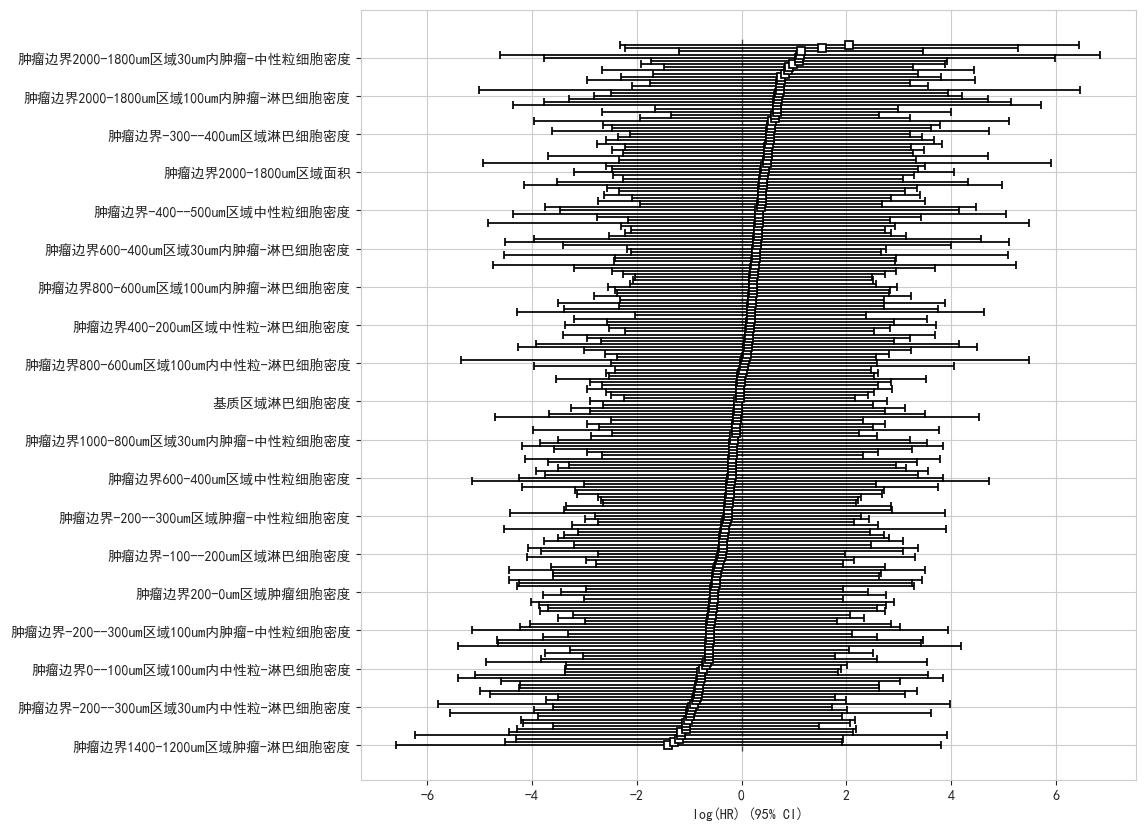

In [59]:
plt.figure(figsize=(10, 10))
cph.plot()
plt.locator_params(axis='y', nbins=20) 
plt.show()

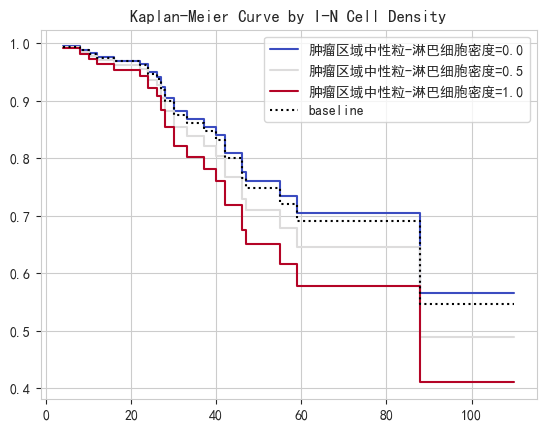

In [62]:
cph.plot_covariate_groups("肿瘤区域中性粒-淋巴细胞密度", [0, 0.5, 1.0], cmap='coolwarm')
plt.title(f'Kaplan-Meier Curve by I-N Cell Density')
plt.show()

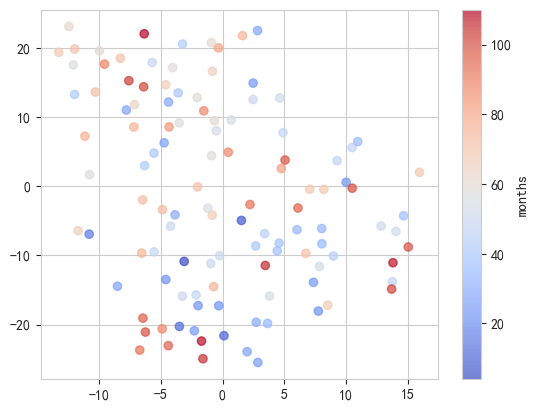

In [50]:
censored_feats = feat_df.reset_index(drop=True)
censored_surv = censored_feats[["days"]]
censored_feats = censored_feats.drop(["文件名", "days", "vital_status"], axis=1)
# 对特征进行t-sne降维
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
# X_tsne = tsne.fit_transform(feats)

# 去除掉删失数据
X_tsne = tsne.fit_transform(censored_feats)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=censored_surv["days"], cmap='coolwarm', alpha=0.7)
plt.colorbar(label="months")
plt.show()

In [32]:
uncensored_feats = feat_df[feat_df["vital_status"] != 0]
uncensored_feats = uncensored_feats.reset_index(drop=True)
uncensored_surv = uncensored_feats[["days"]]
uncensored_feats = uncensored_feats.drop(["文件名", "days", "vital_status"], axis=1)
uncensored_feats

,基质区域肿瘤细胞密度,肿瘤区域肿瘤细胞密度,肿瘤边界2000-1800um区域肿瘤细胞密度,肿瘤边界1800-1600um区域肿瘤细胞密度,肿瘤边界1600-1400um区域肿瘤细胞密度,肿瘤边界1400-1200um区域肿瘤细胞密度,肿瘤边界1200-1000um区域肿瘤细胞密度,肿瘤边界1000-800um区域肿瘤细胞密度,肿瘤边界800-600um区域肿瘤细胞密度,肿瘤边界600-400um区域肿瘤细胞密度,...,肿瘤边界1000-800um区域面积,肿瘤边界800-600um区域面积,肿瘤边界600-400um区域面积,肿瘤边界400-200um区域面积,肿瘤边界200-0um区域面积,肿瘤边界0--100um区域面积,肿瘤边界-100--200um区域面积,肿瘤边界-200--300um区域面积,肿瘤边界-300--400um区域面积,肿瘤边界-400--500um区域面积
0,0.307464,0.706541,0.271711,0.239688,0.236214,0.112245,0.160352,0.264312,0.146911,0.195389,...,0.161155,0.177103,0.189770,0.156065,0.185562,0.374277,0.562160,0.538835,0.411928,0.333577
1,0.086807,0.322168,0.016145,0.016600,0.034205,0.007036,0.008342,0.024325,0.030946,0.050066,...,0.254001,0.257878,0.332166,0.369391,0.454297,0.593703,0.232474,0.075496,0.030755,0.016463
2,0.087318,0.393636,0.129439,0.121204,0.133738,0.030278,0.045094,0.067396,0.039584,0.046646,...,0.332063,0.345505,0.416774,0.485985,0.531394,0.465045,0.066827,0.014529,0.001092,0.000000
3,0.127508,0.213433,0.603537,0.430580,0.339471,0.122971,0.163370,0.294580,0.174698,0.171490,...,0.192731,0.221076,0.265390,0.206313,0.143494,0.204975,0.232256,0.154038,0.051596,0.006042
4,0.165862,0.354007,0.000000,0.000000,0.304262,0.048070,0.104659,0.238295,0.143623,0.154917,...,0.255460,0.405519,0.671704,0.731196,0.883296,0.606460,0.468360,0.249046,0.077895,0.009192
5,0.034862,0.077914,0.073768,0.063741,0.051405,0.021289,0.031688,0.070426,0.037304,0.057522,...,0.183955,0.166714,0.153608,0.134511,0.153743,0.327159,0.293178,0.199742,0.124909,0.070681
6,0.347554,0.427755,0.000000,0.000000,0.312466,0.148821,0.233659,0.551609,0.304152,0.266521,...,0.052444,0.135305,0.271311,0.382110,0.446843,0.573439,0.367940,0.139474,0.040892,0.023225
7,0.321049,0.563352,0.429528,0.255011,0.239145,0.099604,0.152151,0.287295,0.214451,0.244737,...,0.156588,0.302640,0.436442,0.378320,0.364210,0.433236,0.294787,0.127897,0.069902,0.060360
8,0.023827,0.490671,0.000000,0.009140,0.036421,0.014278,0.011318,0.024039,0.015749,0.013373,...,0.047377,0.062029,0.082068,0.082920,0.059393,0.090785,0.061095,0.039369,0.014635,0.006452
9,0.152260,0.372160,0.332986,0.246272,0.215273,0.089203,0.143033,0.323276,0.252250,0.192349,...,0.150169,0.174381,0.329996,0.379149,0.301156,0.372786,0.484663,0.483437,0.335601,0.345732


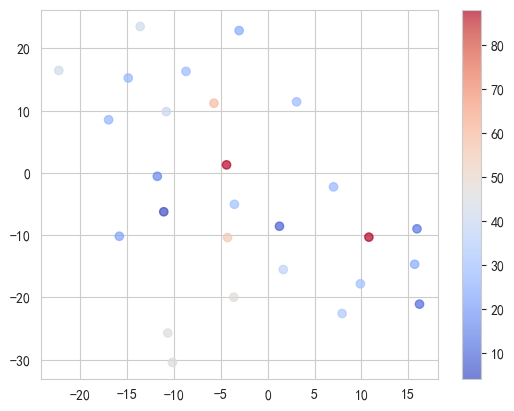

In [37]:
# 对特征进行t-sne降维
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
# X_tsne = tsne.fit_transform(feats)

# 去除掉删失数据
X_tsne = tsne.fit_transform(uncensored_feats)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=uncensored_surv["days"], cmap='coolwarm', alpha=0.7)
plt.colorbar()
plt.show()

In [38]:
# 创建相关矩阵
corr_matrix = feats.corr()
corr_matrix

,基质区域肿瘤细胞密度,肿瘤区域肿瘤细胞密度,肿瘤边界2000-1800um区域肿瘤细胞密度,肿瘤边界1800-1600um区域肿瘤细胞密度,肿瘤边界1600-1400um区域肿瘤细胞密度,肿瘤边界1400-1200um区域肿瘤细胞密度,肿瘤边界1200-1000um区域肿瘤细胞密度,肿瘤边界1000-800um区域肿瘤细胞密度,肿瘤边界800-600um区域肿瘤细胞密度,肿瘤边界600-400um区域肿瘤细胞密度,...,肿瘤边界1000-800um区域面积,肿瘤边界800-600um区域面积,肿瘤边界600-400um区域面积,肿瘤边界400-200um区域面积,肿瘤边界200-0um区域面积,肿瘤边界0--100um区域面积,肿瘤边界-100--200um区域面积,肿瘤边界-200--300um区域面积,肿瘤边界-300--400um区域面积,肿瘤边界-400--500um区域面积
基质区域肿瘤细胞密度,1.000000,0.525301,0.246097,0.283686,0.369777,0.488937,0.353895,0.724296,0.794319,0.869111,...,-0.016363,0.032866,0.076769,0.129346,0.187644,0.228622,0.307217,0.274264,0.241989,0.228157
肿瘤区域肿瘤细胞密度,0.525301,1.000000,0.208607,0.190144,0.207012,0.115062,0.065099,0.301754,0.323226,0.383686,...,-0.067547,-0.052196,-0.027913,-0.027451,-0.009370,-0.010795,0.037432,0.059870,0.080845,0.101884
肿瘤边界2000-1800um区域肿瘤细胞密度,0.246097,0.208607,1.000000,0.899120,0.800039,0.351128,0.336708,0.432687,0.269914,0.266735,...,0.187879,0.222801,0.214966,0.193134,0.189055,0.081334,0.137896,0.191310,0.229849,0.243741
肿瘤边界1800-1600um区域肿瘤细胞密度,0.283686,0.190144,0.899120,1.000000,0.876395,0.388589,0.361546,0.451989,0.293699,0.290964,...,0.246924,0.280143,0.262280,0.210996,0.150535,0.026432,0.120491,0.186131,0.225342,0.244696
肿瘤边界1600-1400um区域肿瘤细胞密度,0.369777,0.207012,0.800039,0.876395,1.000000,0.417879,0.397681,0.517066,0.345109,0.341453,...,0.239059,0.315166,0.361344,0.355057,0.313861,0.166889,0.217971,0.231673,0.234973,0.238199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
肿瘤边界0--100um区域面积,0.228622,-0.010795,0.081334,0.026432,0.166889,0.134658,0.181228,0.200276,0.150213,0.181703,...,0.250218,0.312461,0.408347,0.561252,0.842859,1.000000,0.790631,0.585850,0.450242,0.378285
肿瘤边界-100--200um区域面积,0.307217,0.037432,0.137896,0.120491,0.217971,0.199549,0.261410,0.266185,0.209975,0.237841,...,0.244176,0.288398,0.316744,0.381165,0.644898,0.790631,1.000000,0.938031,0.829812,0.749786
肿瘤边界-200--300um区域面积,0.274264,0.059870,0.191310,0.186131,0.231673,0.212182,0.275907,0.262471,0.202363,0.217383,...,0.245786,0.273609,0.269598,0.289909,0.519949,0.585850,0.938031,1.000000,0.963273,0.911740
肿瘤边界-300--400um区域面积,0.241989,0.080845,0.229849,0.225342,0.234973,0.205248,0.273148,0.254480,0.189998,0.194752,...,0.258518,0.273472,0.247718,0.243776,0.455919,0.450242,0.829812,0.963273,1.000000,0.984686


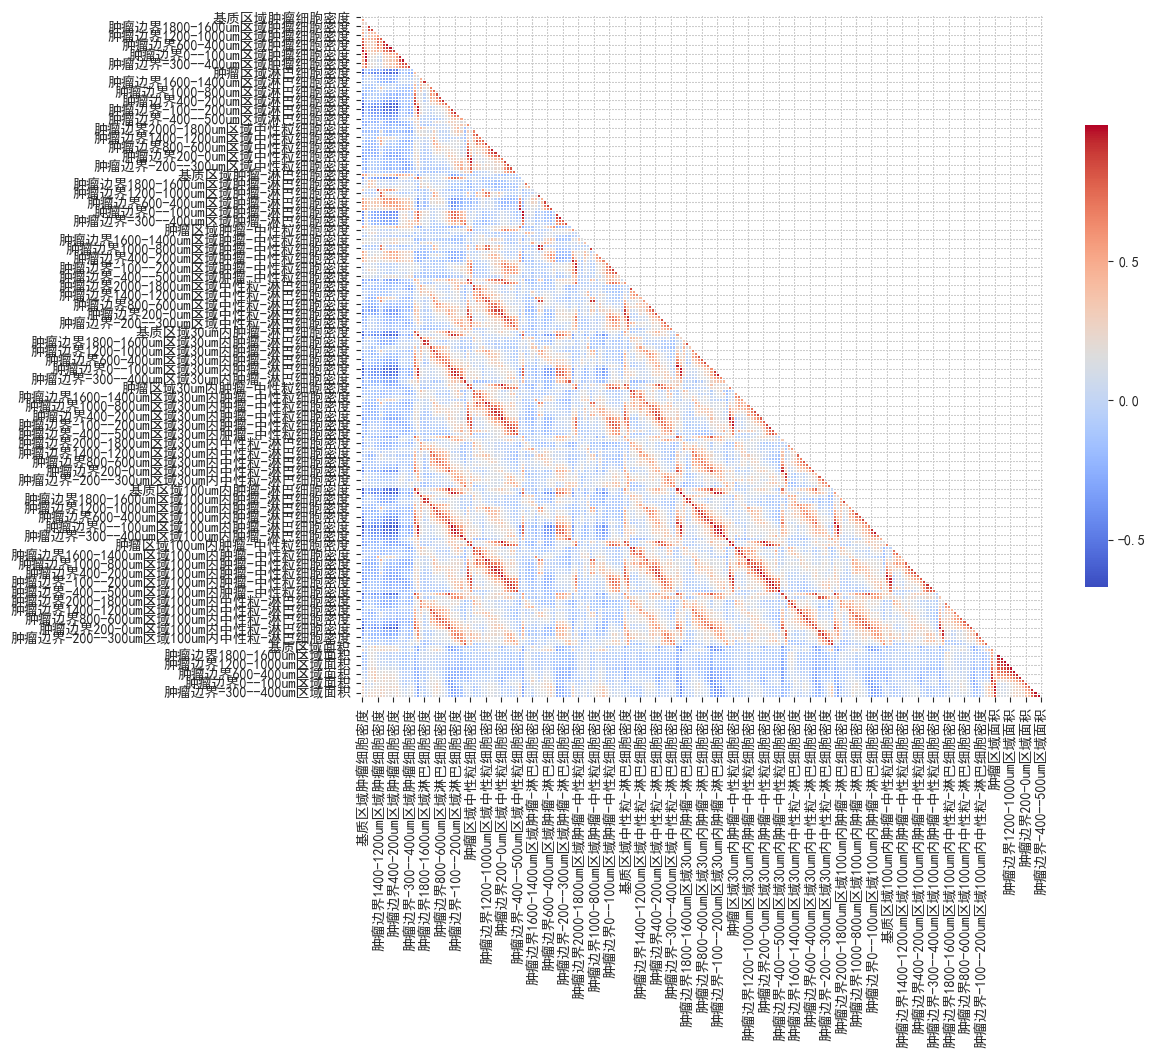

In [45]:
import seaborn as sns
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
                      annot = False,
                      annot_kws = {'size': 12})
#add the column names as labels
# ax.set_yticklabels(corr_matrix.columns, rotation = 0)
# ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [66]:
uncensored_feats = feat_df[feat_df["vital_status"] != 0]
uncensored_feats = uncensored_feats.sort_values(by="days", ascending=True)
uncensored_feats = uncensored_feats.reset_index(drop=True)
uncensored_feats = uncensored_feats.drop(["文件名", "days", "vital_status"], axis=1)
uncensored_feats

,基质区域肿瘤细胞密度,肿瘤区域肿瘤细胞密度,肿瘤边界2000-1800um区域肿瘤细胞密度,肿瘤边界1800-1600um区域肿瘤细胞密度,肿瘤边界1600-1400um区域肿瘤细胞密度,肿瘤边界1400-1200um区域肿瘤细胞密度,肿瘤边界1200-1000um区域肿瘤细胞密度,肿瘤边界1000-800um区域肿瘤细胞密度,肿瘤边界800-600um区域肿瘤细胞密度,肿瘤边界600-400um区域肿瘤细胞密度,...,肿瘤边界1000-800um区域面积,肿瘤边界800-600um区域面积,肿瘤边界600-400um区域面积,肿瘤边界400-200um区域面积,肿瘤边界200-0um区域面积,肿瘤边界0--100um区域面积,肿瘤边界-100--200um区域面积,肿瘤边界-200--300um区域面积,肿瘤边界-300--400um区域面积,肿瘤边界-400--500um区域面积
0,0.127508,0.213433,0.603537,0.430580,0.339471,0.122971,0.163370,0.294580,0.174698,0.171490,...,0.192731,0.221076,0.265390,0.206313,0.143494,0.204975,0.232256,0.154038,0.051596,0.006042
1,0.152260,0.372160,0.332986,0.246272,0.215273,0.089203,0.143033,0.323276,0.252250,0.192349,...,0.150169,0.174381,0.329996,0.379149,0.301156,0.372786,0.484663,0.483437,0.335601,0.345732
2,0.347554,0.427755,0.000000,0.000000,0.312466,0.148821,0.233659,0.551609,0.304152,0.266521,...,0.052444,0.135305,0.271311,0.382110,0.446843,0.573439,0.367940,0.139474,0.040892,0.023225
3,0.195683,0.679295,0.538124,0.522480,0.506705,0.196113,0.273860,0.476455,0.219499,0.189234,...,0.141511,0.217639,0.236598,0.215968,0.090368,0.126673,0.107246,0.073948,0.040629,0.037625
4,0.034862,0.077914,0.073768,0.063741,0.051405,0.021289,0.031688,0.070426,0.037304,0.057522,...,0.183955,0.166714,0.153608,0.134511,0.153743,0.327159,0.293178,0.199742,0.124909,0.070681
5,0.181161,0.169161,0.524128,0.363562,0.358329,0.121849,0.196537,0.443931,0.265890,0.198369,...,0.072219,0.079846,0.083044,0.130394,0.181428,0.321397,0.159340,0.051961,0.007797,0.000379
6,0.321049,0.563352,0.429528,0.255011,0.239145,0.099604,0.152151,0.287295,0.214451,0.244737,...,0.156588,0.302640,0.436442,0.378320,0.364210,0.433236,0.294787,0.127897,0.069902,0.060360
7,0.034643,0.081575,0.000000,0.000000,0.000000,0.000000,1.000000,0.567953,0.033639,0.006037,...,0.008522,0.041312,0.059364,0.063848,0.140948,0.426400,0.511785,0.438914,0.311500,0.269178
8,0.036776,0.355222,0.034828,0.057402,0.048637,0.016336,0.021402,0.050959,0.024452,0.025536,...,0.069843,0.093409,0.135509,0.135007,0.201477,0.412095,0.380725,0.332847,0.208815,0.143689
9,0.233964,0.637490,0.348004,0.347319,0.262086,0.088972,0.102326,0.145171,0.103674,0.137313,...,0.072765,0.083079,0.130408,0.166719,0.166159,0.272208,0.305312,0.206496,0.100513,0.046175


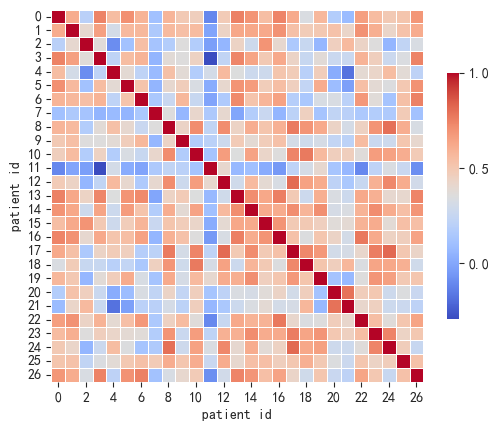

In [77]:
import seaborn as sns
# 创建相关矩阵
corr_matrix = uncensored_feats.transpose().corr("spearman")

mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(6, 8)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
                      annot = False,
                      annot_kws = {'size': 12})
#add the column names as labels
plt.xlabel("patient id")
plt.ylabel("patient id")
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})